# Learning Machines - Week 2

### kmeans Class
#### Usage:
Init by using ```kmeans(minimumValue, maximumValue, dimensions 2/3, pointNumber, numberOfClusters)```

Use .cluster() to run the clustering process


In [165]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

# Set some styling rules
%matplotlib inline
plt.style.use('ggplot')

class kmeans:
    def __init__(self, minimum = 0, maximum = 100, dimensions = 3, pointNum = 800, clusterNum = 6):
        
        self.is3D = True if dimensions == 3 else False
        
        #Params passed to the constructor
        self.min = minimum
        self.max = maximum
        self.dim = dimensions
        self.clusterNum = clusterNum
        self.iteration = 0
        
        #The family each point belongs to
        self.family = np.zeros(pointNum)
        
        #So we can check wheter we finished
        self.lastFamily = np.zeros(pointNum)
        
        #Make random points (ints) in  tuples based on dimensions and number of points specified to the constructor
        self.points = np.random.randint(maximum, size=(pointNum, dimensions))
        
        #Make random Centroids
        self.clusters = np.random.randint(maximum, size=(clusterNum, dimensions))
        
        #Set the labels and the cluster centers
        for i, pointCoords in enumerate(self.points):
            dist = np.linalg.norm(self.points[i]-self.clusters[0])
            for j, clusterCoords in enumerate(self.clusters):
                if(dist > np.linalg.norm(self.points[i]-self.clusters[j])):
                    self.family[i] = j
                    dist = np.linalg.norm(self.points[i]-self.clusters[j])
    
    def updateCenters(self):
        
        sumOfAllCenters = np.zeros(self.clusters.shape)
        familyMemberCount = np.zeros(self.clusters.shape[0])
        
        #Iterate over all points
        for i in range(self.points.shape[0]):
            sumOfAllCenters[int(self.family[i])] = sumOfAllCenters[int(self.family[i])] + self.points[i]
            familyMemberCount[int(self.family[i])] += 1
            
        for i in range(self.clusterNum):
            if int(familyMemberCount[i]) == 0:
                continue
                
            self.clusters[i] = sumOfAllCenters[i] / familyMemberCount[i]

   
    def updateFamily(self):
        
        #Set the labels and the cluster centers
        self.lastFamily = np.copy(self.family)
        for i, pointCoords in enumerate(self.points):
            dist = np.linalg.norm(self.points[i]-self.clusters[int(self.family[i])])
            for j, clusterCoords in enumerate(self.clusters):
                if(dist > np.linalg.norm(self.points[i]-self.clusters[j])):
                    self.family[i] = j
                    dist = np.linalg.norm(self.points[i]-self.clusters[j])
    
    def cluster(self):
        while not self.hasEnded().all():
            self.updateCenters()
            self.updateFamily()
            self.iteration += 1
        else:
            print("It took {} iterations to solve the program".format(self.iteration))
            self.__draw__()
        
        
    def hasEnded(self):
        return self.family == self.lastFamily
        
    def __draw__(self):
        
        #Create a plot figure so we can easily switch between 2D and 3D
        fig = plt.figure()
        
        if self.is3D:
            
            colors = cm.spectral(np.linspace(0, 1, self.family.shape[0]))
            
            #Add a 3D plot
            ax = fig.add_subplot(111, projection='3d') 
            
            #Prints all the points generated
            index = 0
            for pointCoords in self.points:
                ax.scatter(pointCoords[0], pointCoords[1], pointCoords[2], s=10, c=colors[int(self.family[index]) * 100], alpha=0.6)
                index += 1
            
            #Reset the index
            index = 0
            
            #Prints all the clusters generated
            for clusterCoords in self.clusters:
                ax.scatter(clusterCoords[0], clusterCoords[1], clusterCoords[2], c=colors[int(self.family[index]) * 85], s=400, marker='*')
                index += 1
                
        #It's a 2D plot
        else:
            
            # drawing points
            plt.scatter(self.points[:,0], self.points[:,1], c=self.family)
            
            # drawing centers
            plt.scatter(self.clusters[:,0], self.clusters[:,1], c='red') 


### 3D Example:
```kmeans(min, max, dim, pointNum, clusterNum)```

It took 26 iterations to solve the program


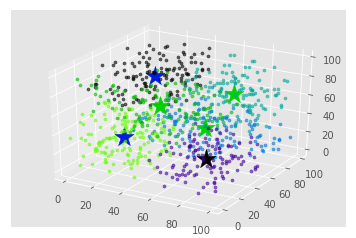

In [168]:
km = kmeans(0, 100, 3, 800, 6) 
km.cluster()

### 2D Example:

It took 35 iterations to solve the program


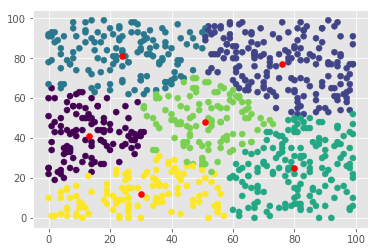

In [169]:
km = kmeans(0, 100, 2, 800, 6) 
km.cluster()